In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
data = pd.read_csv("../CSV/big_files/ais_train.csv", sep="|")
data.head()

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3


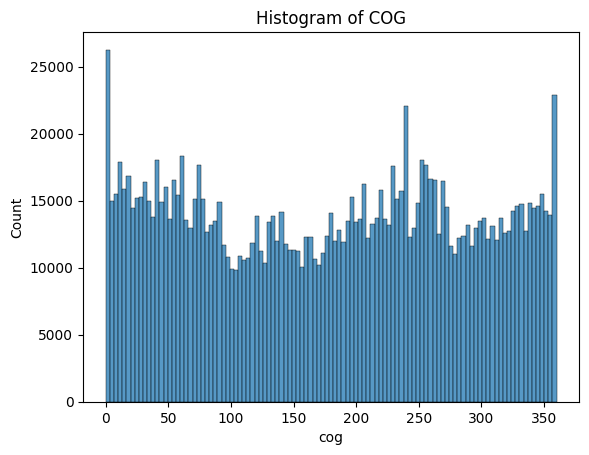

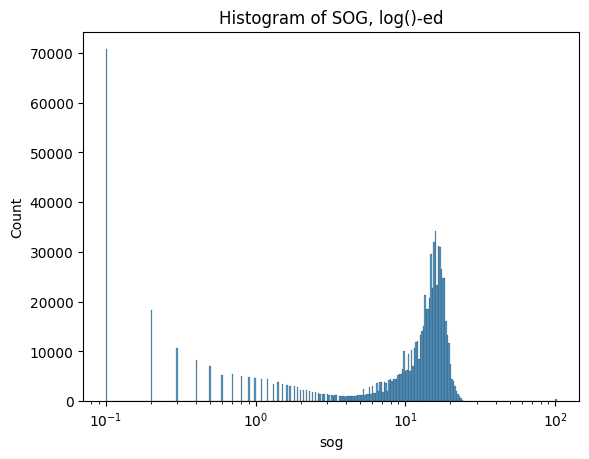

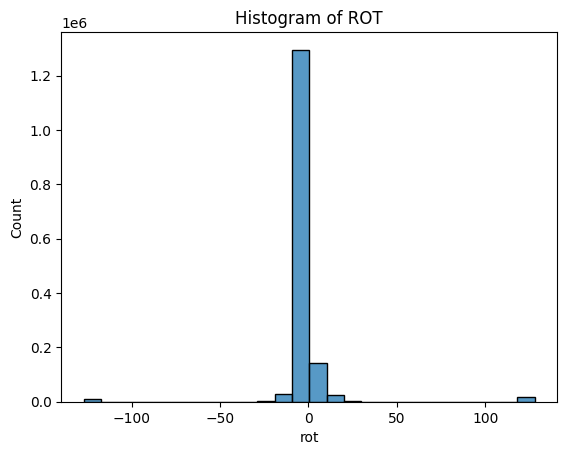

In [13]:
sns.histplot(data, x="cog")
plt.title("Histogram of COG")
plt.show()

sns.histplot(data, x="sog", log_scale=True)
plt.title("Histogram of SOG, log()-ed")
plt.show()

sns.histplot(data, x="rot", binwidth=10)
plt.title("Histogram of ROT")
plt.show()

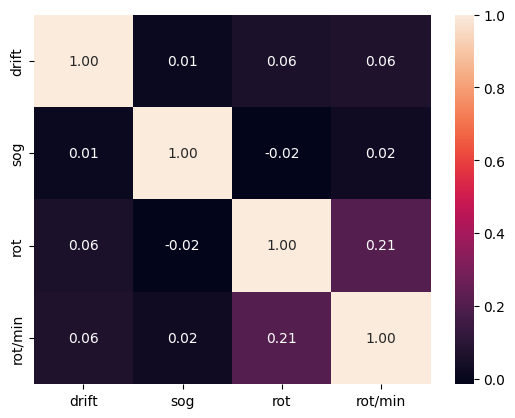

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId,drift,rot/min
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f,-196.0,0.00000
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689,237.4,1.60705
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19,1.0,0.00000
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126,45.6,0.00000
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3,1.0,0.00000


In [14]:
#Does higher drift cause change in speed and rotation?

data["drift"] = data["heading"] - data["cog"]
data["rot/min"] = (data["rot"]/4.733)**2            #the actual degrees/min
corr = data[["drift", "sog", "rot", "rot/min"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

data.head()

#not really...

In [10]:
#What about velocities? Or change in lat/lon
data["v_x"] = data["sog"]*np.cos(data["cog"])
data["v_y"] = data["sog"]*np.sin(data["cog"])

data_copy = data.copy()
data_copy["time"] = data["time"].apply(lambda time: pd.to_datetime(time))

#lat/lon change
data_copy.sort_values(["vesselId", "time"], inplace=True)
data_copy["lat_shift"] = data_copy["latitude"].shift(1).fillna(0)
data_copy["delta_lat"] = data_copy["lat_shift"] - data["latitude"]

data_copy["lon_shift"] = data_copy["longitude"].shift(1).fillna(0)
data_copy["delta_lon"] = data_copy["lon_shift"] - data["longitude"]

#data_copy["bearing"] = np.arctan2(np.sin(data_copy["delta_lon"])*np.cos(data_copy["lat_shift"]),
#                             np.cos(data_copy["latitude"])*np.sin(data_copy["lat_shift"]) - np.sin(data_copy["latitude"])*np.cos(data_copy["lat_shift"])*np.cos(data_copy["delta_lon"]))



data_copy.drop(columns=["etaRaw", "vesselId", "portId", "lat_shift", "lon_shift", "time"], inplace=True)
corr = data_copy.corr()
sns.heatmap(corr)
plt.show()

data_copy.head()



KeyboardInterrupt: 

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

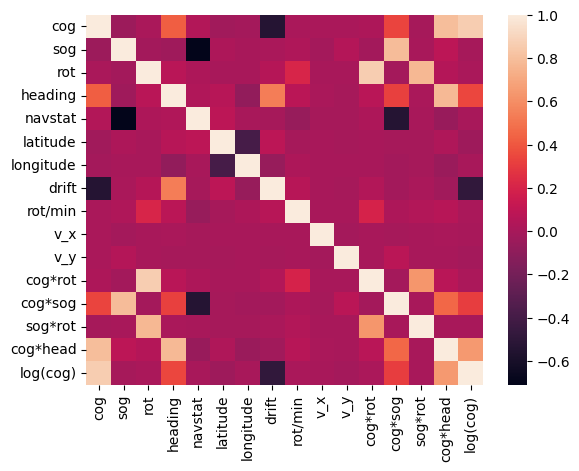

In [6]:
#Random interaction terms
copy = data.copy().drop(columns=["time", "etaRaw", "portId", "vesselId"])
copy["cog*rot"] = copy["cog"]*copy["rot"]
copy["cog*sog"] = copy["cog"]*copy["sog"]
copy["sog*rot"] = copy["sog"]*copy["rot"]
copy["cog*head"] = copy["cog"]*copy["heading"]
copy["log(cog)"] = np.log(copy["cog"])

corr = copy.corr()
sns.heatmap(corr)

C:\Users\marti\AppData\Local\Temp\ipykernel_21172\4238797429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boat["lon_shift"] = boat["longitude"].shift(1).fillna(0)
C:\Users\marti\AppData\Local\Temp\ipykernel_21172\4238797429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boat["delta_lon"] = boat["lon_shift"] - boat["longitude"]
C:\Users\marti\AppData\Local\Temp\ipykernel_21172\4238797429.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,cog,sog,rot,heading,navstat,latitude,longitude,drift,lon_shift,delta_lon,lat_shift,delta_lat,bearing
44159,64.0,0.0,6,9,1,9.45853,-79.85258,-55.0,0.00000,79.85258,0.00000,-9.45853,-1.579702
44477,301.0,0.0,4,356,1,9.45838,-79.85236,55.0,-79.85258,-0.00022,9.45853,0.00015,0.972110
44645,317.4,0.0,-1,11,1,9.45845,-79.85236,-306.4,-79.85236,0.00000,9.45838,-0.00007,-3.141593
45429,127.0,0.1,-1,346,1,9.45844,-79.85222,219.0,-79.85236,-0.00014,9.45845,0.00001,1.499446
45913,99.0,0.0,5,346,1,9.45845,-79.85236,247.0,-79.85222,0.00014,9.45844,-0.00001,-1.642142


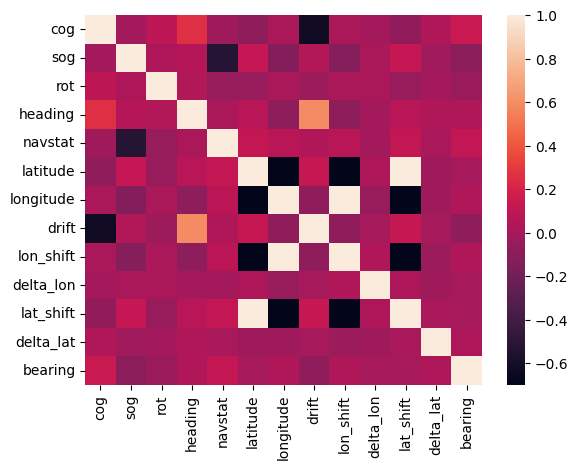

In [16]:
#Navigational BS
copy = data.copy().drop(columns=["time", "etaRaw", "portId", "rot/min"])
boat = copy[copy["vesselId"] == "61e9f3aeb937134a3c4bfe3d"]

boat["lon_shift"] = boat["longitude"].shift(1).fillna(0)
boat["delta_lon"] = boat["lon_shift"] - boat["longitude"]

boat["lat_shift"] = boat["latitude"].shift(1).fillna(0)
boat["delta_lat"] = boat["lat_shift"] - boat["latitude"]

boat["bearing"] = np.arctan2(np.sin(boat["delta_lon"])*np.cos(boat["lat_shift"]),
                             np.cos(boat["latitude"])*np.sin(boat["lat_shift"]) - np.sin(boat["latitude"])*np.cos(boat["lat_shift"])*np.cos(boat["delta_lon"]))

boat.drop(columns=["vesselId"], inplace=True)
corr = boat.corr()
sns.heatmap(corr)

boat.head()
